<h4 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h4>

This was a final assignment designed as part of IBM's Data Science course: Data Analysis with Python. The authors of this lab can be found at the end of the notebook. 

##### Project Scenario
A Real Estate Investment Trust (REIT) tasked a Data Analyst with determining the market price of houses with a given set of features. Tasks include pre-processing, data tranformation, and creating regression models to predict housing prices using attributes such as square footage, number of bedrooms, number of floors, etc. They also asked the Data Analyst to split the data into training and testing samples for model evaluation. 

#### About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It can be found from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this lab. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


##### **Importing required libraries**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

##### Module 1: Importing Data Sets

Download the dataset by running the cell below.


In [28]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')
#("https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?select=kc_house_data.csv")

Load the csv:


We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [29]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Q1

Displaying data types of each column.

In [30]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Obtaining statistical summary of the dataframe.

In [31]:
df.describe().round(decimals=2)

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,2.161300e+04,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,10806.00,4.580302e+09,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,6239.28,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,0.00,1.000102e+06,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,5403.00,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,10806.00,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,16209.00,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,21612.00,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


##### Module 2: Data Wrangling


##### Q2
Dropping the columns <code>"id"</code> and <code>"Unnamed: 0"</code>.

In [32]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe().round(decimals=2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


Checking for missing values for the columns <code>bedrooms</code> and <code>bathrooms</code>.

In [33]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replacing missing values of column <code>'bedrooms'</code> with the mean of the column <code>'bedrooms'</code>.

In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Replacing missing values of the column <code>'bathrooms'</code> with the mean of <code>'bathrooms' </code>.

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [37]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


##### Module 3: Exploratory Data Analysis

##### Q3

Counting the number of houses with unique floor values.

In [38]:
# Question 3
num_of_houses= df['floors'].value_counts().to_frame()

##### Q4

Plotting <code>boxplot</code> with Seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

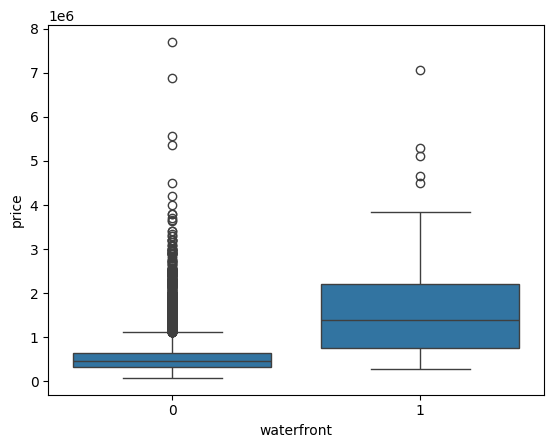

In [39]:
sns.boxplot(x='waterfront', y='price', data=df)

##### Q5

Plotting scatter plot with regression line with Seaborn library to determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

(0.0, 8081250.0)

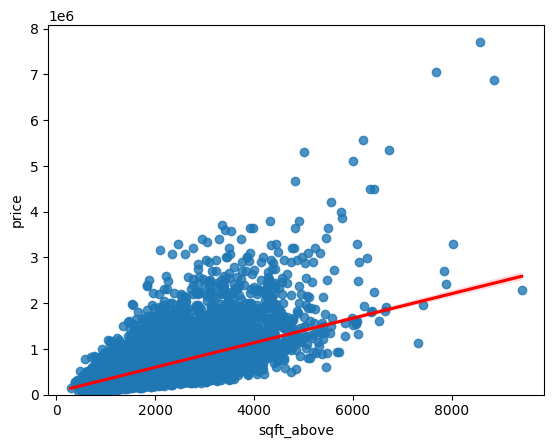

In [40]:
# Question 5
sns.regplot(x='sqft_above', y='price', line_kws={"color":"red"}, data=df)
plt.ylim(0,)

Finding the feature other than price that is most correlated with price.

In [41]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

##### Module 4: Model Development

Fitting a linear regression model using the longitude feature <code>'long'</code> and calculating R^2.

In [42]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

##### Q6

Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> and calculating R^2.

In [43]:
X1= df[['sqft_living']]
Y1= df['price']

lm1 = LinearRegression()
lm1.fit(X1,Y1)
r_squared = lm1.score(X1, Y1)

print("R Squared is:", r_squared)

R Squared is: 0.4928532179037931


##### Q7

Fitting a linear regression model to predict the <code>'price'</code> using all features.

In [44]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y2= df['price']

lm2 = LinearRegression()
lm2.fit(Z, Y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Calculating R^2 of linear regression model that predicts price using all features.

In [45]:
# Question 7B
r2_lm2 = lm2.score(Z, Y2)

print("R Squared value is:", r2_lm2)

R Squared value is: 0.65769516660375


##### Q8

Creating a list of tuples, with the first element in the tuple contains names of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [46]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

##### Q8

Creating pipeline object to predict the 'price', fitting the object using all features, and calculate the R^2.

In [47]:
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y2)
ypipe=pipe.predict(Z)

print(ypipe[0:4])

print("R Squared is:", pipe.score(Z, Y2))

[349661.63257834 559125.84252576 449514.4532694  393268.21994295]
R Squared is: 0.7513408515988734


##### Module 5: Model Evaluation and Refinement

Importing the necessary modules:

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Splitting data into training and testing sets.

In [49]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


##### Q9

Creating and fitting a Ridge regression object using training data. Setting the regularization parameter to 0.1, and calculating R^2 using the test data.

In [50]:
from sklearn.linear_model import Ridge

In [51]:
rr_martin = Ridge(alpha=0.1)

rr_martin.fit(x_train, y_train)
r2test = rr_martin.score(x_test,y_test)

print("R^2:", r2test)

R^2: 0.6478759163939112


##### Q10

Performing a second order polynomial transform on both training data and testing data. Creating and fitting a Ridge object using the training data. Setting the regularisation parameter to 0.1, and calculating R^2 utilising the test data provided.

In [52]:
pr= PolynomialFeatures(degree=2, include_bias=False)

x_train_pr= pr.fit_transform(x_train, y_train) # oops. I only needed to transform the x_train 
x_test_pr = pr.fit_transform(x_test, y_test) # oops same here. I only needed to transform the x_test

rmodel=Ridge(alpha=0.1)
rmodel.fit(x_train_pr, y_train)

test_score = rmodel.score(x_test_pr, y_test)

print("R^2 Test Model:", test_score)

R^2 Test Model: 0.7002744252009028


## <h5>About the Authors of the IBM Lab:</h5> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.<br><br>
Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>




## <h5 align="center"> © IBM Corporation 2020. All rights reserved. <h5/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
